In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
import plotly.graph_objects as go
#from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/lanaal-dabbas/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/lanaal-dabbas/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/lanaal-dabbas/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/lanaal-dabbas/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, i

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/lanaal-dabbas/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/lanaal-dabbas/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/lanaal-dabbas/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/lanaal-dabbas/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, i

AttributeError: _ARRAY_API not found

# Reading Data

In [2]:
df =pd.read_csv('marketing_campaign.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/14,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data Preprocessing

In [4]:
#rename the Marital_Status to be State
df.rename(columns={'Marital_Status':'State'},inplace=True)
df

,ID,Year_Birth,Education,State,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/14,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
#we cann't use "Year_Birth" column so we insert a new one that calculate the age
df.insert(2,"Age",2022-df['Year_Birth'])
df

,ID,Year_Birth,Age,Education,State,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,65,Graduation,Single,58138.0,0,0,4/9/12,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,68,Graduation,Single,46344.0,1,1,8/3/14,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,57,Graduation,Together,71613.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,38,Graduation,Together,26646.0,1,0,10/2/14,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,41,PhD,Married,58293.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,55,Graduation,Married,61223.0,0,1,13-06-2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,76,PhD,Together,64014.0,2,1,10/6/14,56,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,41,Graduation,Divorced,56981.0,0,0,25-01-2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,66,Master,Together,69245.0,0,1,24-01-2014,8,...,3,0,0,0,0,0,0,3,11,0


In [6]:
#how much they spend on wine ,fruits, meat, fish ,sweet, and gold
df['Spending']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [7]:
#covert the date in "Dt_Customer" into one format YYYY-mm-dd ==> YY-mm-dd all the same
df['Dt_Customer'] =pd.to_datetime(df['Dt_Customer']).dt.strftime('%y-%m-%d')
df

/var/folders/2_/5rflfrqj113fggyw5wy7lzpm0000gn/T/ipykernel_75818/1307772155.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] =pd.to_datetime(df['Dt_Customer']).dt.strftime('%y-%m-%d')


,ID,Year_Birth,Age,Education,State,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spending
0,5524,1957,65,Graduation,Single,58138.0,0,0,12-04-09,58,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,68,Graduation,Single,46344.0,1,1,14-08-03,38,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,57,Graduation,Together,71613.0,0,0,13-08-21,26,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,38,Graduation,Together,26646.0,1,0,14-10-02,26,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,41,PhD,Married,58293.0,1,0,14-01-19,94,...,0,0,0,0,0,0,3,11,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,55,Graduation,Married,61223.0,0,1,13-06-13,46,...,0,0,0,0,0,0,3,11,0,1341
2236,4001,1946,76,PhD,Together,64014.0,2,1,14-10-06,56,...,0,0,0,1,0,0,3,11,0,444
2237,7270,1981,41,Graduation,Divorced,56981.0,0,0,14-01-25,91,...,0,1,0,0,0,0,3,11,0,1241
2238,8235,1956,66,Master,Together,69245.0,0,1,14-01-24,8,...,0,0,0,0,0,0,3,11,0,843


In [8]:
df['Dt_Customer'].dtype

dtype('O')

In [9]:
#remove the - to change the type into int
df['Dt_Customer'] =pd.to_datetime(df['Dt_Customer']).dt.strftime('%m%d%y')
df['Dt_Customer'] = df['Dt_Customer'].astype(int)
df

/var/folders/2_/5rflfrqj113fggyw5wy7lzpm0000gn/T/ipykernel_75818/4271679408.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] =pd.to_datetime(df['Dt_Customer']).dt.strftime('%m%d%y')


,ID,Year_Birth,Age,Education,State,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spending
0,5524,1957,65,Graduation,Single,58138.0,0,0,120409,58,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,68,Graduation,Single,46344.0,1,1,81403,38,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,57,Graduation,Together,71613.0,0,0,81321,26,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,38,Graduation,Together,26646.0,1,0,101402,26,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,41,PhD,Married,58293.0,1,0,11419,94,...,0,0,0,0,0,0,3,11,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,55,Graduation,Married,61223.0,0,1,61313,46,...,0,0,0,0,0,0,3,11,0,1341
2236,4001,1946,76,PhD,Together,64014.0,2,1,101406,56,...,0,0,0,1,0,0,3,11,0,444
2237,7270,1981,41,Graduation,Divorced,56981.0,0,0,11425,91,...,0,1,0,0,0,0,3,11,0,1241
2238,8235,1956,66,Master,Together,69245.0,0,1,11424,8,...,0,0,0,0,0,0,3,11,0,843


In [10]:
df['Dt_Customer'].dtype

dtype('int64')

In [11]:
#adding new column gives the number of children
df.insert(6,"Children",df['Kidhome']+df['Teenhome'])
df

,ID,Year_Birth,Age,Education,State,Income,Children,Kidhome,Teenhome,Dt_Customer,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spending
0,5524,1957,65,Graduation,Single,58138.0,0,0,0,120409,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,68,Graduation,Single,46344.0,2,1,1,81403,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,57,Graduation,Together,71613.0,0,0,0,81321,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,38,Graduation,Together,26646.0,1,1,0,101402,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,41,PhD,Married,58293.0,1,1,0,11419,...,0,0,0,0,0,0,3,11,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,55,Graduation,Married,61223.0,1,0,1,61313,...,0,0,0,0,0,0,3,11,0,1341
2236,4001,1946,76,PhD,Together,64014.0,3,2,1,101406,...,0,0,0,1,0,0,3,11,0,444
2237,7270,1981,41,Graduation,Divorced,56981.0,0,0,0,11425,...,0,1,0,0,0,0,3,11,0,1241
2238,8235,1956,66,Master,Together,69245.0,1,0,1,11424,...,0,0,0,0,0,0,3,11,0,843


In [12]:
df['State'] = df['State'].replace(['Married', 'Together'],'Relationship')
df['State'] = df['State'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')
df

,ID,Year_Birth,Age,Education,State,Income,Children,Kidhome,Teenhome,Dt_Customer,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spending
0,5524,1957,65,Graduation,Single,58138.0,0,0,0,120409,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,68,Graduation,Single,46344.0,2,1,1,81403,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,57,Graduation,Relationship,71613.0,0,0,0,81321,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,38,Graduation,Relationship,26646.0,1,1,0,101402,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,41,PhD,Relationship,58293.0,1,1,0,11419,...,0,0,0,0,0,0,3,11,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,55,Graduation,Relationship,61223.0,1,0,1,61313,...,0,0,0,0,0,0,3,11,0,1341
2236,4001,1946,76,PhD,Relationship,64014.0,3,2,1,101406,...,0,0,0,1,0,0,3,11,0,444
2237,7270,1981,41,Graduation,Single,56981.0,0,0,0,11425,...,0,1,0,0,0,0,3,11,0,1241
2238,8235,1956,66,Master,Relationship,69245.0,1,0,1,11424,...,0,0,0,0,0,0,3,11,0,843


In [13]:
df['Savings']=df['Income'] - df['Spending'] #The amount of money the customer saves
df

,ID,Year_Birth,Age,Education,State,Income,Children,Kidhome,Teenhome,Dt_Customer,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spending,Savings
0,5524,1957,65,Graduation,Single,58138.0,0,0,0,120409,...,0,0,0,0,0,3,11,1,1617,56521.0
1,2174,1954,68,Graduation,Single,46344.0,2,1,1,81403,...,0,0,0,0,0,3,11,0,27,46317.0
2,4141,1965,57,Graduation,Relationship,71613.0,0,0,0,81321,...,0,0,0,0,0,3,11,0,776,70837.0
3,6182,1984,38,Graduation,Relationship,26646.0,1,1,0,101402,...,0,0,0,0,0,3,11,0,53,26593.0
4,5324,1981,41,PhD,Relationship,58293.0,1,1,0,11419,...,0,0,0,0,0,3,11,0,422,57871.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,55,Graduation,Relationship,61223.0,1,0,1,61313,...,0,0,0,0,0,3,11,0,1341,59882.0
2236,4001,1946,76,PhD,Relationship,64014.0,3,2,1,101406,...,0,0,1,0,0,3,11,0,444,63570.0
2237,7270,1981,41,Graduation,Single,56981.0,0,0,0,11425,...,1,0,0,0,0,3,11,0,1241,55740.0
2238,8235,1956,66,Master,Relationship,69245.0,1,0,1,11424,...,0,0,0,0,0,3,11,0,843,68402.0


# Data cleaning 

In [14]:
#drop the ID column bec it doesn't affect the prediction
df.drop(['ID','Year_Birth'], axis=1,inplace=True)
df

,Age,Education,State,Income,Children,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spending,Savings
0,65,Graduation,Single,58138.0,0,0,0,120409,58,635,...,0,0,0,0,0,3,11,1,1617,56521.0
1,68,Graduation,Single,46344.0,2,1,1,81403,38,11,...,0,0,0,0,0,3,11,0,27,46317.0
2,57,Graduation,Relationship,71613.0,0,0,0,81321,26,426,...,0,0,0,0,0,3,11,0,776,70837.0
3,38,Graduation,Relationship,26646.0,1,1,0,101402,26,11,...,0,0,0,0,0,3,11,0,53,26593.0
4,41,PhD,Relationship,58293.0,1,1,0,11419,94,173,...,0,0,0,0,0,3,11,0,422,57871.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,55,Graduation,Relationship,61223.0,1,0,1,61313,46,709,...,0,0,0,0,0,3,11,0,1341,59882.0
2236,76,PhD,Relationship,64014.0,3,2,1,101406,56,406,...,0,0,1,0,0,3,11,0,444,63570.0
2237,41,Graduation,Single,56981.0,0,0,0,11425,91,908,...,1,0,0,0,0,3,11,0,1241,55740.0
2238,66,Master,Relationship,69245.0,1,0,1,11424,8,428,...,0,0,0,0,0,3,11,0,843,68402.0


In [15]:
#locate the missing data
df.isnull().sum()

Age                     0
Education               0
State                   0
Income                 24
Children                0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Spending                0
Savings                24
dtype: int64

In [16]:
#income has null value so we will replace it with the mean
df['Income']=df['Income'].fillna(df['Income'].mean())
df['Savings']=df['Savings'].fillna(0)


df.isnull().sum()

Age                    0
Education              0
State                  0
Income                 0
Children               0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Spending               0
Savings                0
dtype: int64

In [17]:
#cheack for duplicate
df.duplicated().value_counts()#there is no duplicate

False    2055
True      185
Name: count, dtype: int64

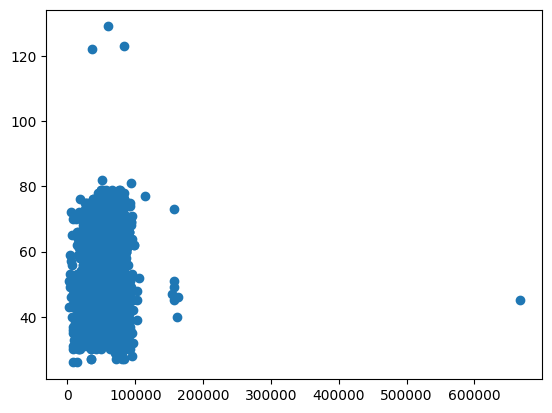

In [18]:
#detect the outlier
plt.scatter(df['Income'],df['Age'])
plt.show()

In [19]:
df['Age']=pd.DataFrame(df['Age'])
df['Age'].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

In [20]:
#the only outlier in the income
print((df['Age'] > 100 ).sum())

3


In [21]:
df['Income']=pd.DataFrame(df['Income'])
df['Income'].describe()

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [22]:
#the only outlier in the income
print((df['Income'] > 200000 ).sum())

1


In [23]:
#drop the outlier
df.drop(df[df['Age'] > 100].index, inplace = True)
df.drop(df[df['Income'] > 200000].index, inplace = True)

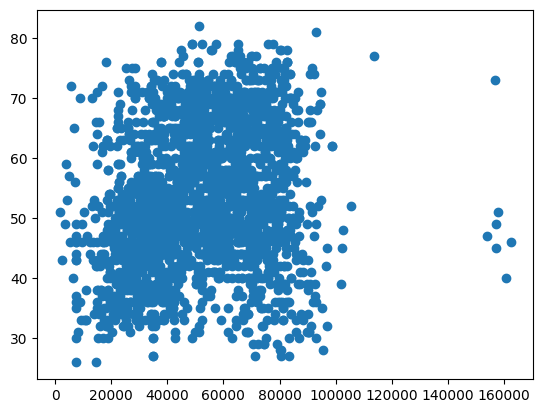

In [24]:
plt.scatter(df['Income'],df['Age'])
plt.show()

# Data normlization

In [25]:
#covert from string ==> number
#first lets get the non-numeric columns
dfs=df.select_dtypes(exclude=[np.number]).columns 
dfs

Index(['Education', 'State'], dtype='object')

In [26]:
df['Education'].value_counts()

Education
Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64

In [27]:
df['State'].value_counts()

State
Relationship    1442
Single           794
Name: count, dtype: int64

In [28]:
df.dtypes

Age                      int64
Education               object
State                   object
Income                 float64
Children                 int64
Kidhome                  int64
Teenhome                 int64
Dt_Customer              int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Spending                 int64
Savings                float64
dtype: object

In [29]:
df['Education'].replace({'Graduation':1,'PhD':2,'Master':3,'2n Cycle':4,'Basic':5},inplace=True)
df['State'].replace({'Married':1,'Together':2,'Single':3,'Divorced':4,'Widow':5,'Alone':6,'Absurd':7,'YOLO':8,'Relationship':9},inplace= True)

/var/folders/2_/5rflfrqj113fggyw5wy7lzpm0000gn/T/ipykernel_75818/851169187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education'].replace({'Graduation':1,'PhD':2,'Master':3,'2n Cycle':4,'Basic':5},inplace=True)
/var/folders/2_/5rflfrqj113fggyw5wy7lzpm0000gn/T/ipykernel_75818/851169187.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.s

In [30]:
df['Income']=df['Income'].astype(int)
df.head(10)

,Age,Education,State,Income,Children,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spending,Savings
0,65,1,3,58138,0,0,0,120409,58,635,...,0,0,0,0,0,3,11,1,1617,56521.0
1,68,1,3,46344,2,1,1,81403,38,11,...,0,0,0,0,0,3,11,0,27,46317.0
2,57,1,9,71613,0,0,0,81321,26,426,...,0,0,0,0,0,3,11,0,776,70837.0
3,38,1,9,26646,1,1,0,101402,26,11,...,0,0,0,0,0,3,11,0,53,26593.0
4,41,2,9,58293,1,1,0,11419,94,173,...,0,0,0,0,0,3,11,0,422,57871.0
5,55,3,9,62513,1,0,1,91309,16,520,...,0,0,0,0,0,3,11,0,716,61797.0
6,51,1,3,55635,1,0,1,121113,34,235,...,0,0,0,0,0,3,11,0,590,55045.0
7,37,2,9,33454,1,1,0,81305,32,76,...,0,0,0,0,0,3,11,0,169,33285.0
8,48,2,9,30351,1,1,0,61306,19,14,...,0,0,0,0,0,3,11,1,46,30305.0
9,72,2,9,5648,2,1,1,31413,68,28,...,0,0,0,0,0,3,11,0,49,5599.0


In [31]:
df.dtypes

Age                      int64
Education                int64
State                    int64
Income                   int64
Children                 int64
Kidhome                  int64
Teenhome                 int64
Dt_Customer              int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Spending                 int64
Savings                float64
dtype: object

# scaling the data between 0-1

In [32]:
y = StandardScaler().fit_transform(df)
normalize2 = pd.DataFrame(y, columns = df.columns)
normalize2.head()

,Age,Education,State,Income,Children,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spending,Savings
0,1.016868,-0.821378,-1.347635,0.288513,-1.264308,-0.824939,-0.930615,1.177095,0.306856,0.983228,...,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,0.0,0.0,2.386338,1.680176,0.264928
1,1.273264,-0.821378,-1.347635,-0.262438,1.395139,1.032627,0.905974,0.186869,-0.383971,-0.871064,...,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,0.0,0.0,-0.419052,-0.962202,-0.207628
2,0.333146,-0.821378,0.742041,0.917992,-1.264308,-0.824939,-0.930615,0.184787,-0.798467,0.362159,...,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,0.0,0.0,-0.419052,0.282541,0.927914
3,-1.290693,-0.821378,0.742041,-1.182621,0.065416,1.032627,-0.930615,0.694574,-0.798467,-0.871064,...,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,0.0,0.0,-0.419052,-0.918994,-1.121063
4,-1.034298,0.077155,0.742041,0.295754,0.065416,1.032627,-0.930615,-1.589781,1.550344,-0.389661,...,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,0.0,0.0,-0.419052,-0.305762,0.327447


In [33]:
df.isnull().sum()

Age                    0
Education              0
State                  0
Income                 0
Children               0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Spending               0
Savings                0
dtype: int64

# K-Means Clustring

/var/folders/2_/5rflfrqj113fggyw5wy7lzpm0000gn/T/ipykernel_75818/493904663.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1, 10), inertias, "bo-", color=colors_nude[0])


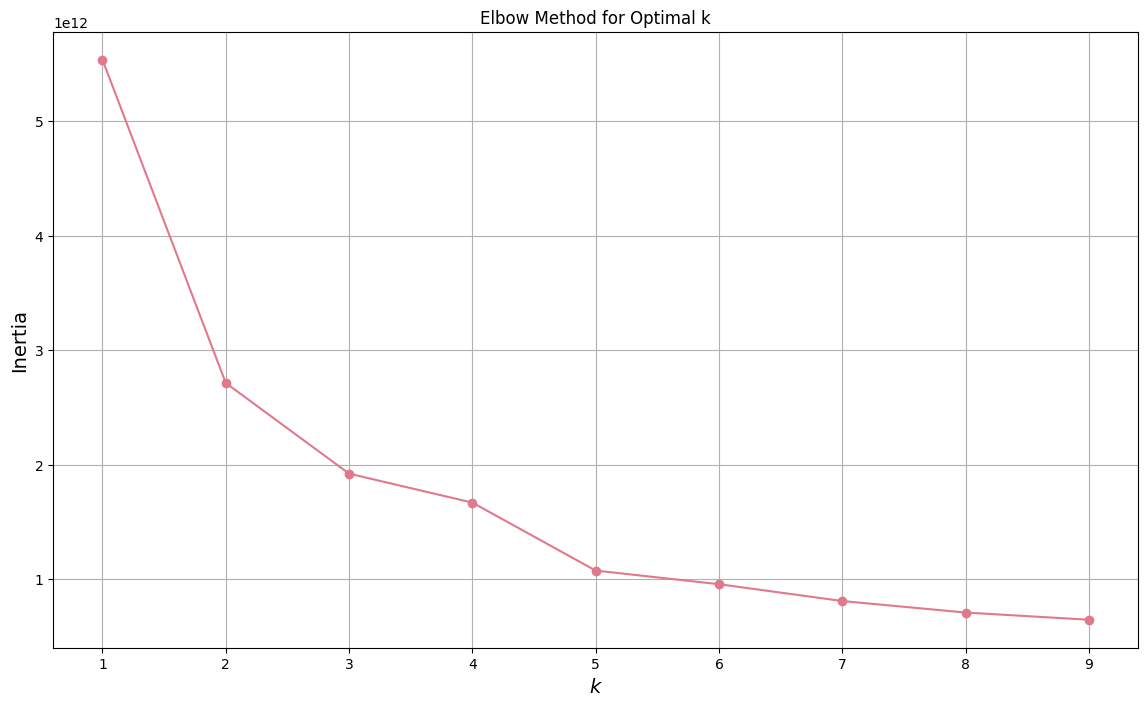

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Example of loading data

# Ensure df is defined and not empty
if df is None or df.empty:
    raise ValueError("DataFrame 'df' is not defined or is empty.")

# Check for any NaN values and handle them
if df.isnull().values.any():
    df = df.dropna()  # Dropping NaN values, alternatively you can fill them

colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
plt.figure(figsize=(14,8))

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 10), inertias, "bo-", color=colors_nude[0])
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


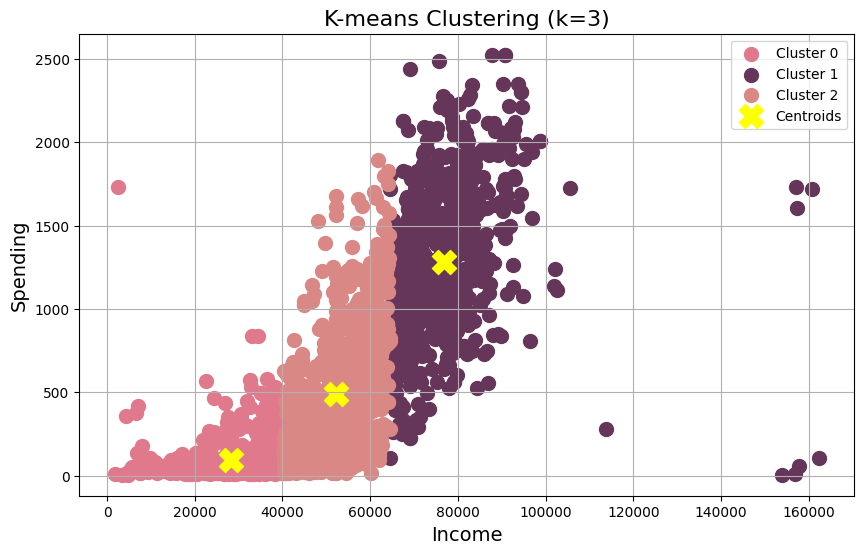

In [35]:
# Selecting relevant features for clustering
features = df[['Income', 'Spending']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

# Plotting the clusters
colors_nude = ['#e0798c', '#65365a', '#da8886']
plt.figure(figsize=(10, 6))

for i in range(3):
    clustered_data = df[df['cluster'] == i]
    plt.scatter(clustered_data['Income'], clustered_data['Spending'], s=100, c=colors_nude[i], label=f'Cluster {i}')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='X', label='Centroids')

plt.xlabel('Income', fontsize=14)
plt.ylabel('Spending', fontsize=14)
plt.title('K-means Clustering (k=3)', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

# Visulaization

### the persantage of each cluster

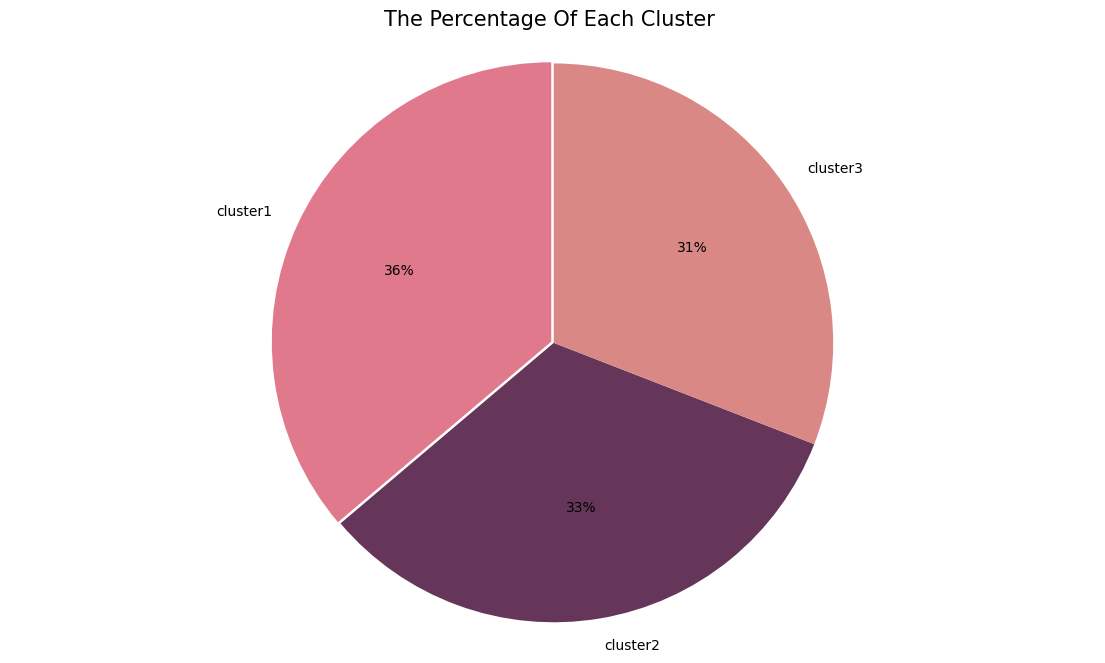

In [66]:
#What is the percentage of each cluster ?
plt.figure(figsize = (14,8) )
plt.pie(list(df['cluster'].value_counts()),labels=['cluster1' , 'cluster2', 'cluster3'],
        autopct='%.00f%%' ,colors=colors_nude, startangle=90  , explode =(0.01,0,0))
plt.title('The Percentage Of Each Cluster ' ,fontsize = 15)
plt.axis('equal')
plt.show()

### cluster0 has younger ages while cluster1 and cluster2 has older ages

/var/folders/2_/5rflfrqj113fggyw5wy7lzpm0000gn/T/ipykernel_75818/1997418831.py:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.kdeplot(data =df, x = 'Age' , hue = 'cluster' , palette=colors_nude[:2])


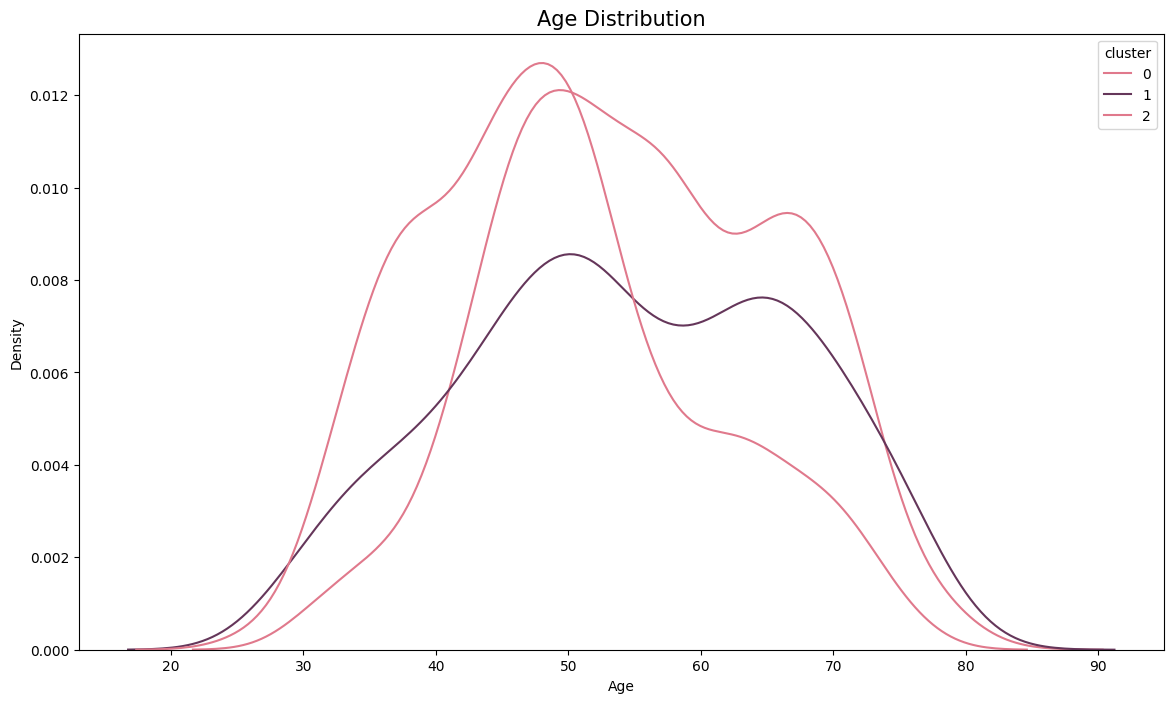

In [37]:
#What is the Age Distribution of each cluster ?
plt.figure(figsize = (14,8) )
sns.kdeplot(data =df, x = 'Age' , hue = 'cluster' , palette=colors_nude[:2])
plt.title('Age Distribution' ,fontsize = 15)
plt.show()

In [38]:
#Insight
#cluster 0 have a wider range of ages and has more young people
#cluster 1 has a relatively old people
clus0 = df[(df['Age'] > 40 )&(df['cluster'] == 0)]
clus1 = df[(df['Age'] > 40 )&(df['cluster'] == 1)]
clus2 = df[(df['Age'] > 40 )&(df['cluster'] == 2)]
print('percentage of customer more than 40 at cluster0 : {0:0.2f}%'.format(len(clus0) / len(df[df['cluster'] == 0] )))
print('percentage of customer more than 40 at cluster1 : {0:0.2f}%'.format(len(clus1) / len(df[df['cluster'] == 1])))
print('percentage of customer more than 40 at cluster1 : {0:0.2f}%'.format(len(clus2) / len(df[df['cluster'] == 2])))

percentage of customer more than 40 at cluster0 : 0.75%
percentage of customer more than 40 at cluster1 : 0.84%
percentage of customer more than 40 at cluster1 : 0.94%


### cluster1 has the higher income

/var/folders/2_/5rflfrqj113fggyw5wy7lzpm0000gn/T/ipykernel_75818/3181611529.py:3: UserWarning:


The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.



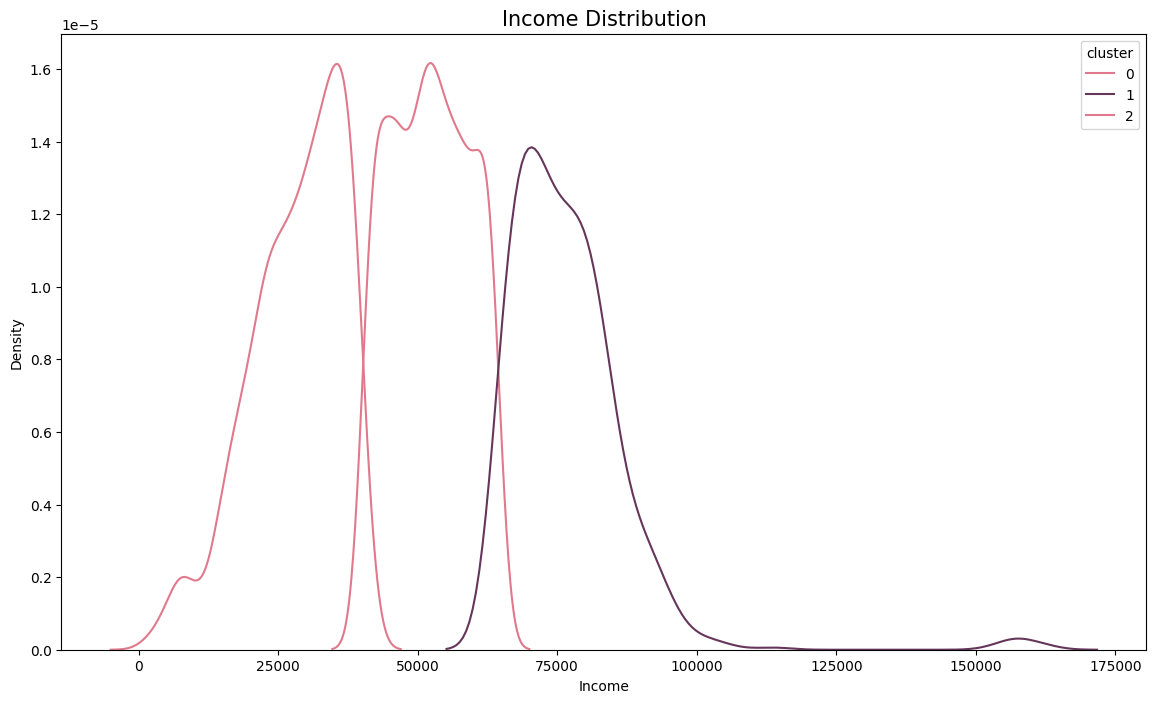

In [67]:
#What is the income Distribution of each cluster ?
plt.figure(figsize = (14,8) )
sns.kdeplot(data =df, x = 'Income' , hue = 'cluster' ,palette=colors_nude[:2])
plt.title('Income Distribution' ,fontsize = 15)
plt.show()


### cluster0 and cluster2 has 1 or 2 children

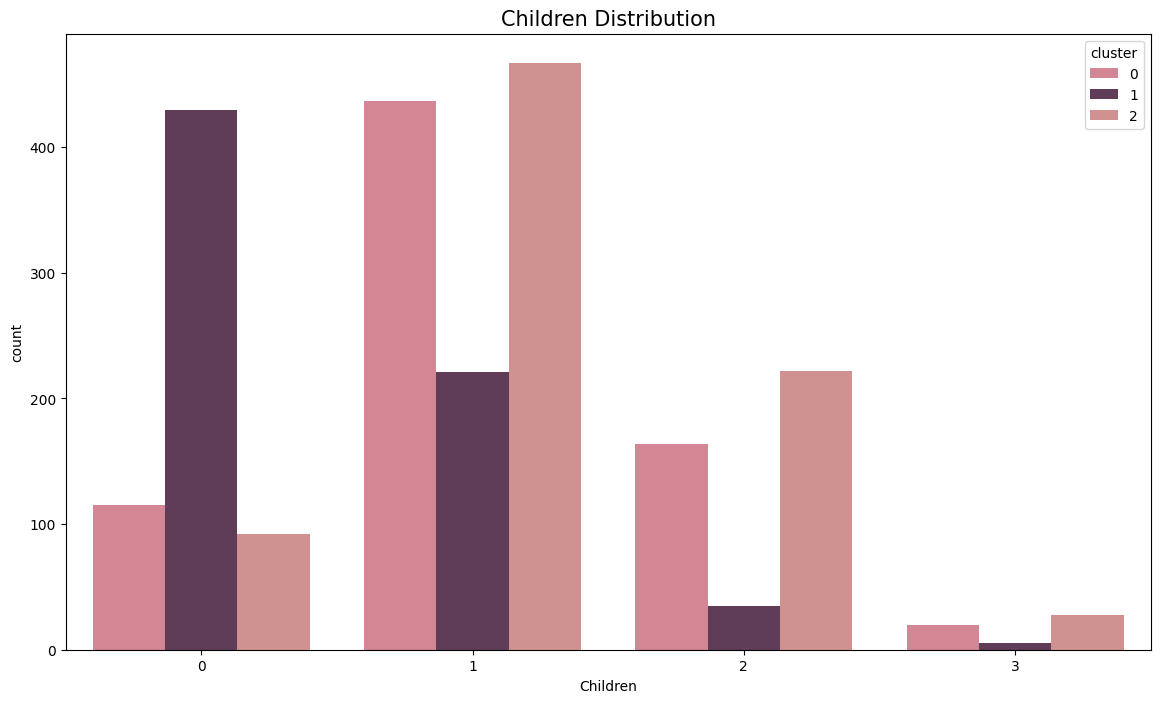

In [68]:
#What is the kids number of each cluster ?
plt.figure(figsize = (14,8) )
sns.countplot(data =df, x = 'Children' , hue = 'cluster' ,palette=colors_nude)
plt.title('Children Distribution' ,fontsize = 15)
plt.show()

### cluster2 has one teenager

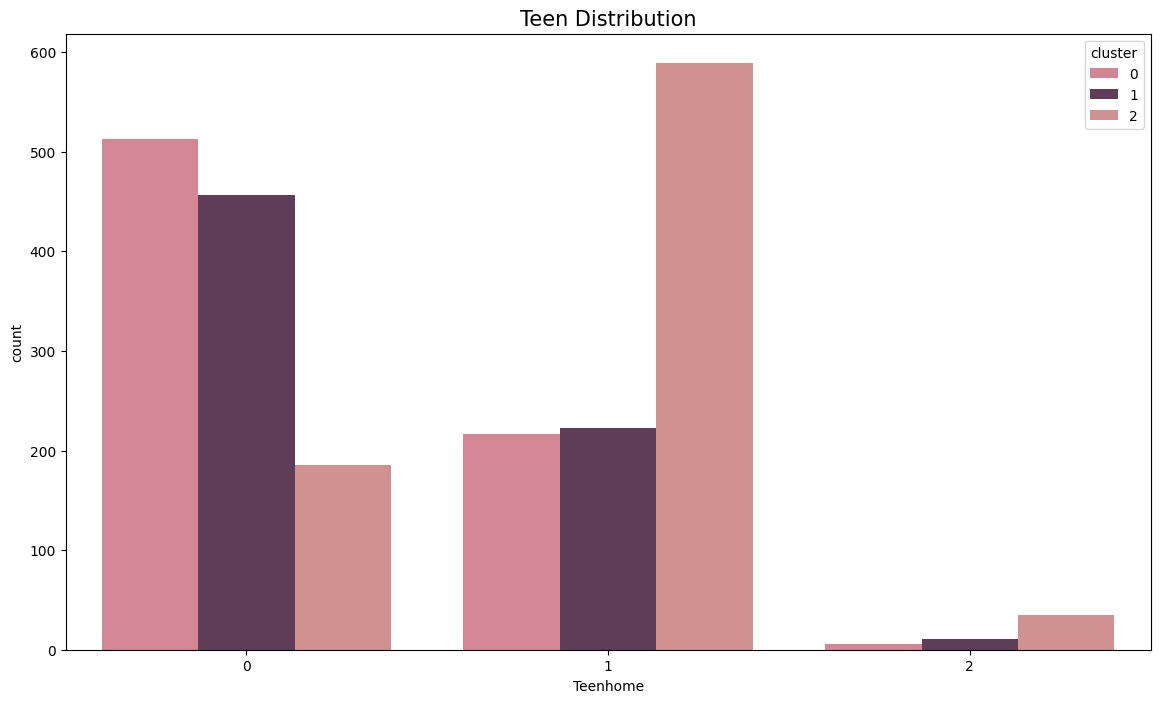

In [69]:
#What is the kids number of each cluster ?
plt.figure(figsize = (14,8) )
sns.countplot(data =df, x = 'Teenhome' , hue = 'cluster' ,palette=colors_nude)
plt.title('Teen Distribution' ,fontsize = 15)
plt.show()

### cluster0 has 1 kid 

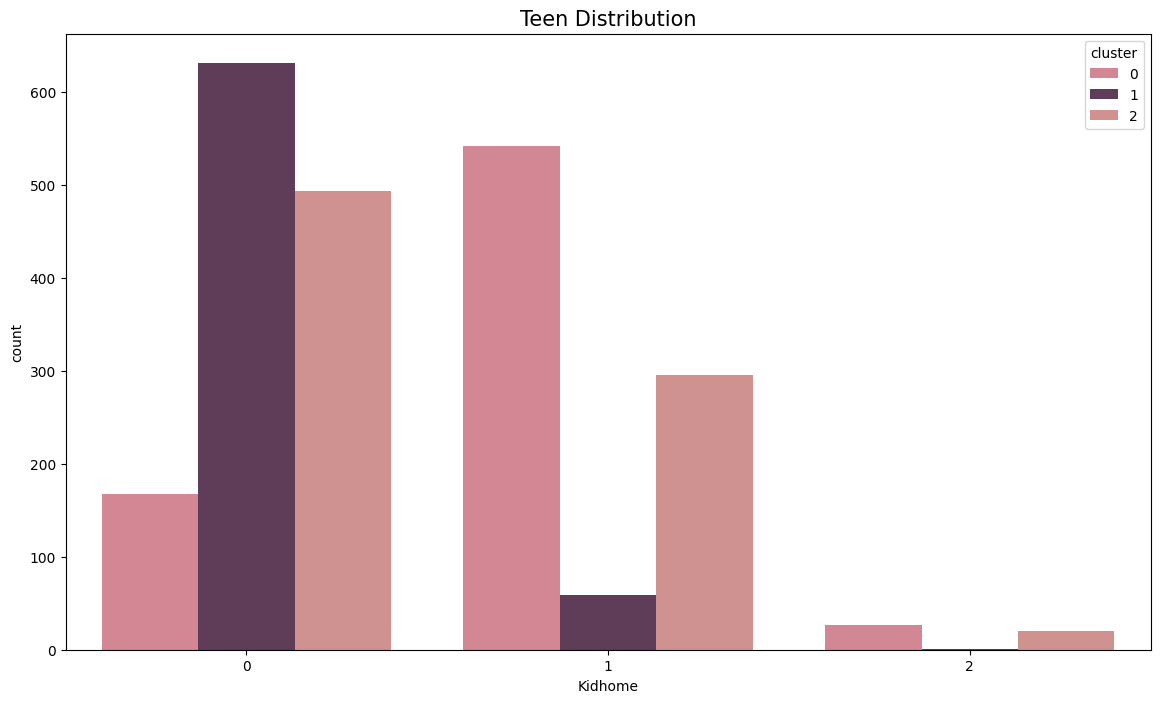

In [73]:
#What is the kids number of each cluster ?
plt.figure(figsize = (14,8) )
sns.countplot(data =df, x = 'Kidhome' , hue = 'cluster' ,palette=colors_nude)
plt.title('Teen Distribution' ,fontsize = 15)
plt.show()

In [41]:
kids_1 = len(df[(df['Children'] > 0) &(df['cluster'] == 1)]) / len(df)
kids_0 = len(df[(df['Children'] > 0) &(df['cluster'] == 0)]) / len(df)
kids_2 = len(df[(df['Children'] > 0) &(df['cluster'] == 2)]) / len(df)
print('Probability of having children at cluster 0 is {0:0.2f}%'.format(kids_0))
print('Probability of having children at cluster 1 is {0:0.2f}%'.format(kids_1))
print('Probability of having children at cluster 2 is {0:0.2f}%'.format(kids_2))
#Insight
#cluster 0 tends to have more kids

Probability of having children at cluster 0 is 0.28%
Probability of having children at cluster 1 is 0.12%
Probability of having children at cluster 2 is 0.32%


### cluster1 spend alot of money

### cluster0 dont spend much

/var/folders/2_/5rflfrqj113fggyw5wy7lzpm0000gn/T/ipykernel_75818/4242228628.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data =df, x = 'cluster' , y = 'Spending' ,palette=colors_nude[:2])
/var/folders/2_/5rflfrqj113fggyw5wy7lzpm0000gn/T/ipykernel_75818/4242228628.py:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data =df, x = 'cluster' , y = 'Spending' ,palette=colors_nude[:2])


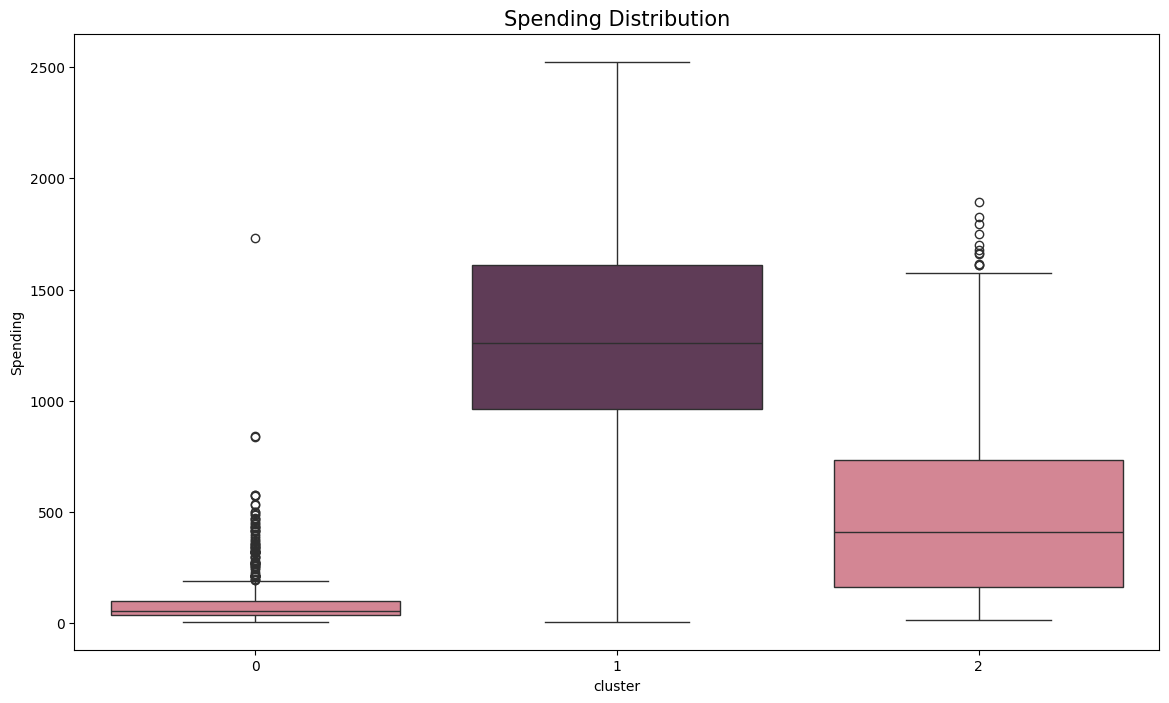

In [42]:
plt.figure(figsize = (14,8) )
sns.boxplot(data =df, x = 'cluster' , y = 'Spending' ,palette=colors_nude[:2])
plt.title('Spending Distribution' ,fontsize = 15)
plt.show()

### cluster1 buy a lot of meat

### cluster2 alot of wine

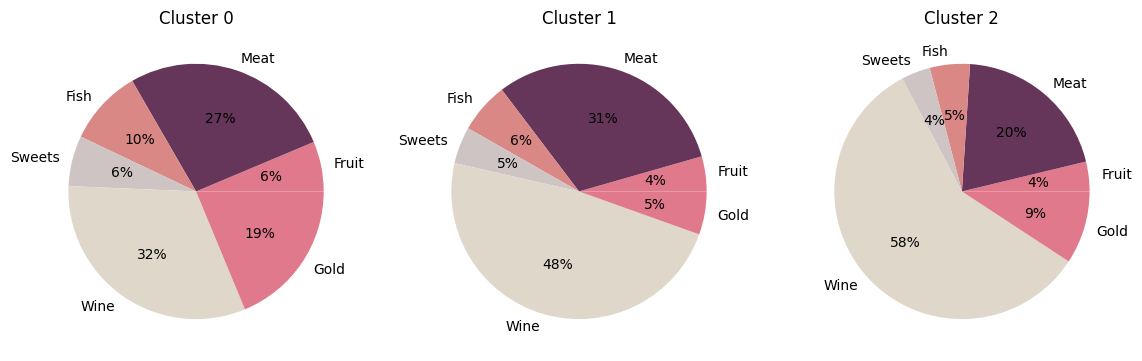

In [74]:
#What is the main product of each cluster ?
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
plt.figure(figsize = (14,8) )
labels = ['Fruit' , 'Meat' , 'Fish' , 'Sweets' , 'Wine' , 'Gold']
for i in range(3):
    counts =[]
    
    d = df[df['cluster'] == i]
    counts.append(d['MntFruits'].sum())
    counts.append(d['MntMeatProducts'].sum())    
    counts.append(d['MntFishProducts'].sum())    
    counts.append(d['MntSweetProducts'].sum())    
    counts.append(d['MntWines'].sum())
    counts.append(d['MntGoldProds'].sum())
    plt.subplot(1,3,i+1)
    plt.title("Cluster "+str(i))
    plt.pie(counts, labels = labels, autopct='%.0f%%' ,colors=colors_nude)
plt.show()